In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
#no. of observations
n = 100

#between 0to 5 we are generating samples
X = np.linspace(0,5,n)

#observed data poitns
y_true = 3 + 2*X -0.5*X**2 + 0.1*X**3 - 0.05*X**4

#observations corrupted with noise(0 mean and 0.5 variance)
y = y_true + np.random.normal(0, 0.5, size = n)


X_features = np.column_stack([X, X**2, X**3, X**4])


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 40)

# X_train.shape

# #normalising/scaling the input features with 0 mean and unit std deviation

mean_train = X_train.mean(axis = 0)
std_train = X_train.std(axis = 0, ddof = 0)

X_train_scaled = (X_train - mean_train)/std_train

# print(X_train_scaled)

#gives all scaled input features with 0 mean and 1 std deviation

X_scaled = np.column_stack([X_train_scaled, X_train_scaled**2, X_train_scaled**3, X_train_scaled**4])


#check the dimesnion of the scaled input feature's matrix
X_scaled.shape

#design matric for the scaled training inputs
X_d = np.column_stack([np.ones((len(X_scaled))), X_scaled])

X_d.shape

#identity matrix comprising of slopes only 

I = np.eye(X_d.shape[1])
print(I)

#penalise the slopes only and not the intercepts

I[0,0] = 0
print(I)


[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


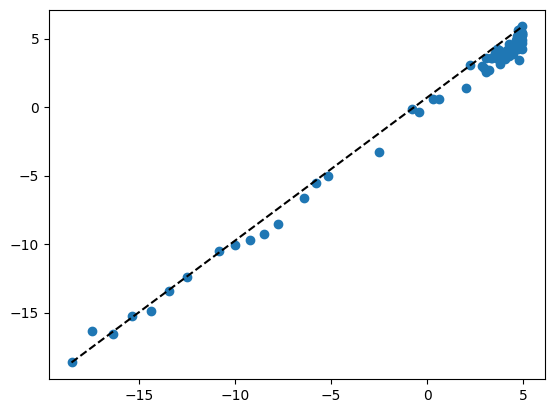

In [3]:
#penality parameter
lamda = 0.5

#least sqaured estimates for ridge regression
beta_ridge = np.linalg.inv(X_d.T@X_d + lamda*I)@X_d.T@y_train

# print(beta_ridge)

#predicted y based on the scaled X_train

y_pred_train = X_d@beta_ridge
# len(y_presd_train)

plt.scatter(y_pred_train, y_train)
plt.plot([y_pred_train.min(), y_pred_train.max()], [y_train.min(), y_train.max()], 'k--')


In [4]:
#residuals based on the scaled traning inputs

residual_train = (y_pred_train - y_train)

SSR_train = np.sum(residual_train**2)
SST_train = np.sum((y_train - np.mean(y_train))**2)

R2_train = 1 - (SSR_train/ SST_train)
print(f" R2_train: {R2_train}")







 R2_train: 0.9947726415306394
